In [ ]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

In [ ]:
# Specify the source image
source = 'https://ultralytics.com/images/bus.jpg'

# Make predictions
results = model.predict(source, save=True, imgsz=320, conf=0.5)

In [ ]:
# # Process results list
# for result in results:
#     boxes = result.boxes  # Boxes object for bounding box outputs
#     masks = result.masks  # Masks object for segmentation masks outputs
#     keypoints = result.keypoints  # Keypoints object for pose outputs
#     probs = result.probs  # Probs object for classification outputs

In [ ]:
# Extract bounding box dimensions
boxes = results[0].boxes.xywh.cpu()
for box in boxes:
    x, y, w, h = box
    print(f"Width of Box: {w}, Height of Box: {h}")

## Print saved image

In [ ]:
img_path = 'runs/detect/predict/bus.jpg'

In [ ]:
# PIL
Image.open(img_path)

## Print reults

In [27]:
# The visualize result in BGR-order numpy array
bgr_array = results[0].plot()
# Convert BGR to RGB
rgb_array = bgr_array[:, :, ::-1]

In [ ]:
# Print image
Image.fromarray(rgb_array)

## Local image

In [40]:
img_path1 = '../_data/resource/id_swe.jpg'
img_path2 = '../_data/resource/note_ticket_class.jpg'

In [41]:
# Make predictions
results = model.predict([img_path1, img_path2])


0: 640x640 3 persons, 1 book, 1: 640x640 1 book, 284.5ms
Speed: 3.4ms preprocess, 142.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


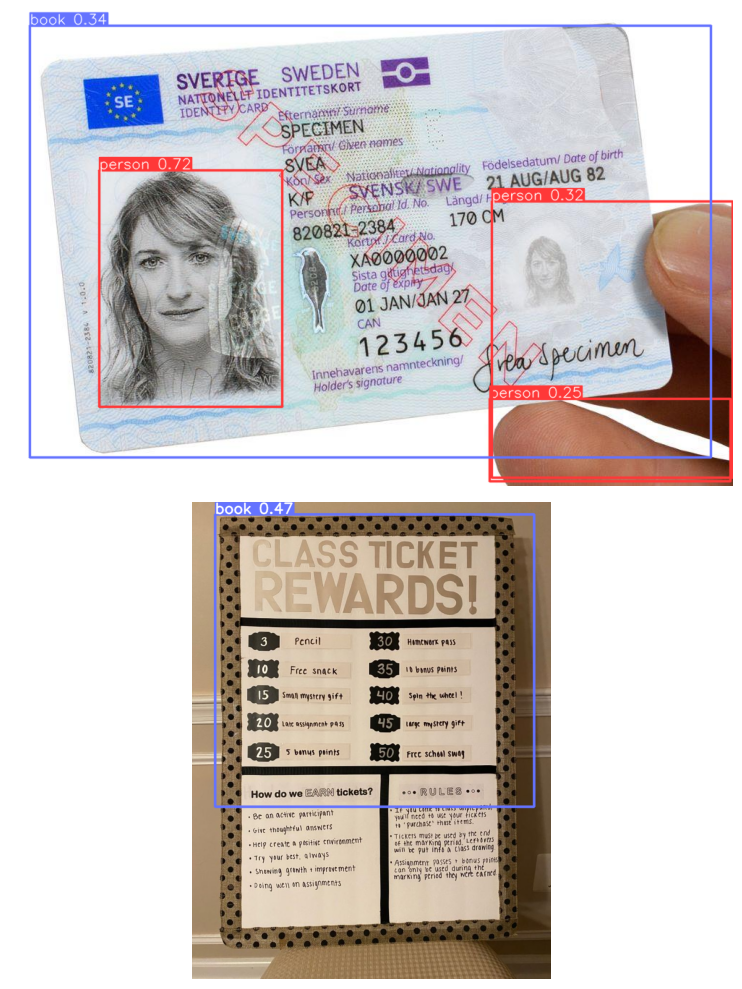

In [42]:
# Initialize a figure for plotting
plt.figure(figsize=(10, 10))

# Process results list
for i, result in enumerate(results):
    # Plot results image, assuming plot() method returns a numpy array in BGR format
    bgr_array = result.plot()

    # Convert BGR to RGB
    rgb_array = bgr_array[:, :, ::-1]

    # Convert numpy array to PIL Image
    img = Image.fromarray(rgb_array)

    # Add a subplot for each image
    ax = plt.subplot(len(results), 1, i + 1)
    ax.imshow(img)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()